In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Colab\ Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
pip install xgboost

Mean Squared Error: 209.9797
Mean Absolute Error (MAE): 11.5524
R^2 Score: 0.1448


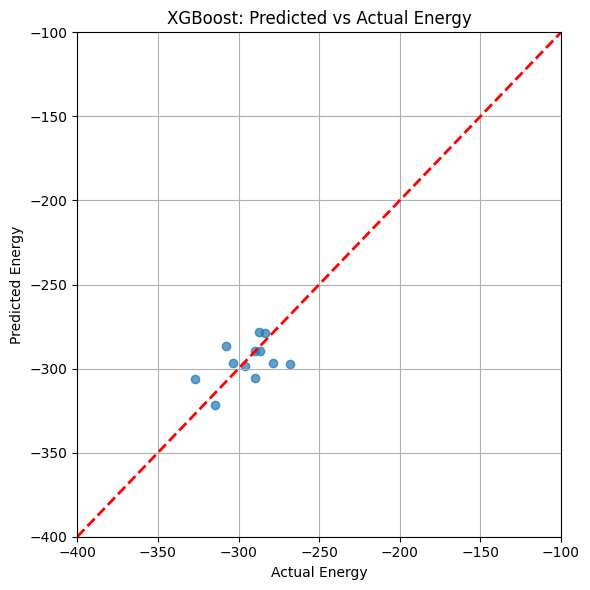

In [22]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# === Load and clean data ===
df = pd.read_csv("blosum_flattened_with_energy - blosum_flattened.csv", skipinitialspace=True)
df = df.dropna(axis=1, how="all")

# === Features and target ===
X = df.iloc[:, 0:180]
y = df["Energy"].values

# === Standardize target ===
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# === Train/test split ===
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# === XGBoost model ===
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    reg_alpha=0.5,
    random_state=42,
    n_jobs=-1,
    verbosity=1,
    tree_method='hist'
)
xgb_model.fit(X_train, y_train_scaled)

# === Predict and inverse scale ===
y_pred_scaled = xgb_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# === Evaluation ===
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

# === Plot predicted vs actual ===
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([-400, -100], [-400, -100], "r--", lw=2)  # reference line
plt.xlim(-400, -100)
plt.ylim(-400, -100)
plt.xlabel("Actual Energy")
plt.ylabel("Predicted Energy")
plt.title("XGBoost: Predicted vs Actual Energy")
plt.grid(True)
plt.tight_layout()
plt.show()

* **Mean Squared Error** (MSE)
Measures the average of the squared differences between predicted and actual values.

  ! Lower is better

* **Mean Absolute Error** (MAE)
Measures the average absolute difference between predicted and actual values.

  ! Lower is better

* **R² Score** (Coefficient of Determination)
Indicates how well the model explains the variance in the data.

  ! 1.0 = perfect prediction, 0 = no better than mean, < 0 = worse than mean

